In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import re

In [2]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [3]:
length = "low"
version = "3"
file = pd.read_csv("matches_"+length+version+".csv", sep=',', header=None, names=['word', 'text'])
dataset = file.drop_duplicates().reset_index(drop=True)

In [4]:
found_sents = []
joint_word = []

for index, row in dataset.iterrows():
        sentences_list = row.text.split('.')
        for sent_index, sentence in enumerate(sentences_list):
            # Check if there is an exact match of the word in the sentence
            if re.search(r'\b' + row['word'] + r'\b', sentence):
                found_sents.append(sentences_list[sent_index-1] + ". " + sentence + ". " + sentences_list[sent_index+1])
                joint_word.append(row['word'])

In [5]:
sentiment_df = pd.DataFrame(columns=['word', 'sent'])
sentiment_df['word'] = joint_word
sentiment_df['sent'] = found_sents

In [6]:
scores = []
for index, row in sentiment_df.iterrows():
    scores.append(analyser.polarity_scores(row.sent))
    
sentiment_df['neg'] = [item['neg'] for item in scores]
sentiment_df['neu'] = [item['neu'] for item in scores]
sentiment_df['pos'] = [item['pos'] for item in scores]
sentiment_df['comp'] = [item['compound'] for item in scores]

In [7]:
# All sents
print(sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).head())
print(sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).tail())

                 word    neg    neu    pos    comp
1269      massive rod  0.422  0.521  0.057 -0.9999
1849  generation zero  0.243  0.657  0.100 -0.9997
4249      crossburner  0.203  0.734  0.062 -0.9985
1536      crossburner  0.203  0.734  0.062 -0.9985
1890      crossburner  0.203  0.734  0.062 -0.9985
     word    neg    neu    pos    comp
2333  njf  0.005  0.868  0.127  0.9999
2332  njf  0.005  0.868  0.127  0.9999
4633  njf  0.005  0.868  0.127  0.9999
2335  njf  0.005  0.868  0.127  0.9999
4635  njf  0.005  0.868  0.127  0.9999


In [8]:
# Grouped by word
grouped_df = sentiment_df.groupby(['word'])[['neg', 'neu', 'pos', 'comp']].mean().sort_values(by=['comp'], ascending=[True])
print(grouped_df.head())
print(grouped_df.tail())

                     neg       neu       pos      comp
word                                                  
crossburner       0.2760  0.676750  0.046500 -0.966100
a fucking retard  0.1802  0.781200  0.038400 -0.703400
saxon dog         0.2908  0.709200  0.000000 -0.557400
massive rod       0.1340  0.792333  0.073833 -0.517633
nopho             0.0795  0.920500  0.000000 -0.456800
                     neg       neu       pos      comp
word                                                  
nasty necklace  0.043000  0.736000  0.221000  0.899900
hunkie          0.000000  0.555000  0.445000  0.975200
roof cat        0.041833  0.884333  0.073167  0.981033
bungal          0.010000  0.812000  0.178000  0.987300
ms. hope        0.002000  0.972000  0.026000  0.997400


<AxesSubplot:xlabel='index'>

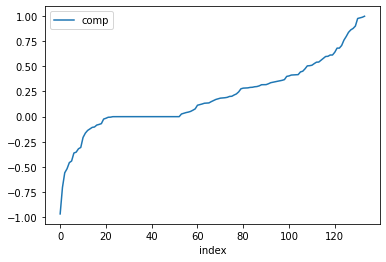

In [9]:
# Grouped by words
tmp = grouped_df['comp'].sort_values().reset_index()
tmp.reset_index(inplace=True)
tmp.plot.line(x="index", y="comp")

<AxesSubplot:xlabel='index'>

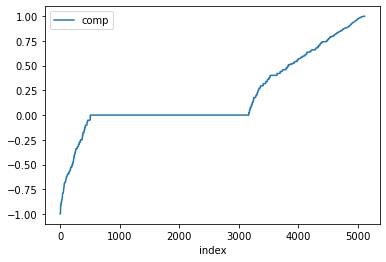

In [10]:
# All sentences
tmp = sentiment_df[['word','comp']].sort_values(by=['comp']).reset_index(drop=True)
tmp.reset_index(inplace=True)
tmp.plot.line(x="index", y="comp")

In [11]:
def print_sent_by_word(word):
    tmp = sentiment_df[sentiment_df['word'] == word][['word', 'sent']]
    for index, row in tmp.iterrows():
        print(row['word'] + ": " + row['sent'])
    print('')

In [12]:
def print_text_by_word(word):
    print(dataset[dataset['word'] == word]['text'].values)
    print('')

In [13]:
search_word = 'crossburner'
print_sent_by_word(search_word)
print_text_by_word(search_word)

crossburner:  dolan babakin babar luck baba yaga babies with rabies baby brave babyhead babylon leaf baby milk plant back street abortions back to the planet bad dog bad earth bad excuses bad manners bad mood bad name bad religion bad samaritans bad shepherds ballpein baltimore gun club banco de gaia bandana bar blu barnyard masterbator baron la croix base basement torture killings bast bastard bastard map bastions batushka baudelaires bauhaus bbr bearded theory beard of wolves beastiality boys beat beatles bechdan jam bedford falls beehive project beehoover beez kneez beluga bendal interlude beneath the wake benediction benefit state ben jackson bent moustache beth bethan bet it all in vegas? better reality betty beyond the state big apple credits big business big country big leaves big unit agricultural regime bill ryder-jones billy club birdhouse bish nadar bistro bitchpups biteback bite back black angels black breath black code black flag black light mutants black listed black mark